## 과정1. 영천시의 (가장최근연도)2023 노년층의 비중확인

### 0. 필요 라이브러리 설치 및 폰트 지정

In [166]:
import pandas as pd

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

plt.rcParams['font.family'] = 'Malgun Gothic'
style.use('grayscale')

### 1. 데이터 불러오기

In [168]:
df_old = pd.read_excel("영천시_고령인구비율.xlsx") 

In [169]:
df_old

,연도,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,전국,7,7.4,7.7,8.1,8.5,8.9,9.3,9.9,10.2,...,12.7,13.1,13.5,14.2,14.8,15.5,16.4,17.1,18.0,19.0
1,영천시,13,13.8,14.6,15.5,16.6,17.4,18.4,19.5,20.2,...,23.7,24.2,24.9,25.8,26.4,27.0,28.3,29.4,30.5,31.7


### 2. 시각화

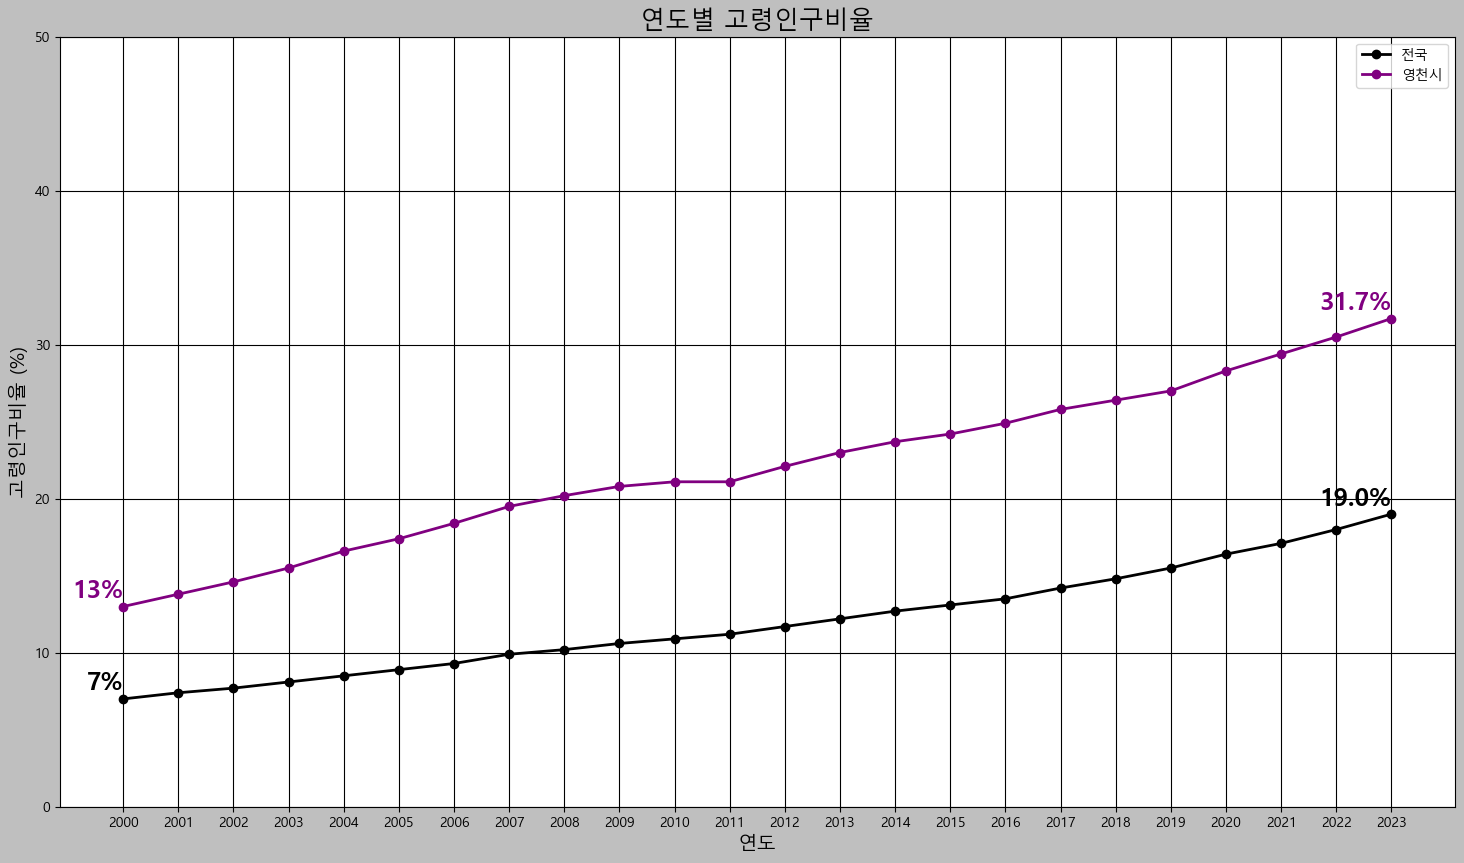

In [170]:
import matplotlib.pyplot as plt

# 연도를 x축으로 설정합니다.
x = df_old.columns[1:]  # '연도' 컬럼을 제외한 모든 컬럼을 선택합니다.

# 전국과 영천시의 고령인구비율을 y축으로 설정합니다.
y_nation = df_old.iloc[0, 1:]  # 첫 번째 행에서 '연도' 값을 제외한 모든 값을 선택합니다.
y_yeongcheon = df_old.iloc[1, 1:]  # 두 번째 행에서 '연도' 값을 제외한 모든 값을 선택합니다.

plt.figure(figsize=(18, 10))  # 그래프의 크기를 설정합니다.
plt.plot(x, y_nation, marker='o', label='전국', linewidth=2)  # 전국의 고령인구비율을 그립니다.
plt.plot(x, y_yeongcheon, color='purple', marker='o', label='영천시', linewidth=2)  # 영천시의 고령인구비율을 그립니다.

# 시작 지점과 마지막 지점에 대한 전국과 영천시의 고령인구비율을 그래프에 표시합니다.
offset = 0.2  # 텍스트를 위로 올릴 오프셋입니다.
plt.text(x[0], y_nation[0] + offset, str(y_nation[0]) + '%', va='bottom', ha='right', fontsize=18, color='black', fontweight='bold')
plt.text(x[0], y_yeongcheon[0] + offset, str(y_yeongcheon[0]) + '%', va='bottom', ha='right', fontsize=18, color='purple', fontweight='bold')
plt.text(x[-1], y_nation[-1] + offset, str(y_nation[-1]) + '%', va='bottom', ha='right', fontsize=18, color='black', fontweight='bold')
plt.text(x[-1], y_yeongcheon[-1] + offset, str(y_yeongcheon[-1]) + '%', va='bottom', ha='right', fontsize=18, color='purple', fontweight='bold')

plt.xlabel('연도', fontsize=14)  # x축 레이블을 설정합니다.
plt.ylabel('고령인구비율 (%)', fontsize=14)  # y축 레이블을 설정합니다.
plt.title('연도별 고령인구비율', fontsize=18)  # 그래프의 제목을 설정합니다.
plt.grid(True)  # 그리드를 표시합니다.
plt.ylim(0, 50)  # y축의 범위를 0에서 50으로 설정합니다.
plt.legend()  # 범례를 표시합니다.
plt.show()  # 그래프를 출력합니다.

2023년도 기준으로 고령인구비율이 전국이 19%인것에 비해 영천시의 고령인구비율은 31.7%를 기록하고 있음  
국제연합(UN)의 기준에 따르면 전체 인구에서 65세 이상이 차지하는 비율인 고령자 인구 비율이 7% 이상이면 고령화 사회,   
14% 이상이면 고령 사회, 20% 이상이면 초고령 사회로 구분된다.

영천시의 경우 이미 2008년에 초고령 사회로 진입하였고 이후 지속적으로 고령인구비율의 증가하여  
현재 2023년도 기준 31.7% 을 기록하고 있다. 이에 영천시의 고령인구비율 관련 대책이 필요하다고 생각이 든다.

## 최근 연도인 2023년도 초고령화인 지역 탐색

1. 데이터 불러오기

In [171]:
df_level1 = pd.read_excel("고령인구비율_행정구역별1레벨.xlsx") 
df_level2 = pd.read_excel("고령인구비율_행정구역별2레벨.xlsx") 

In [172]:
df_level1.head()

,행정구역별1레벨,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,전국,7,7.4,7.7,8.1,8.5,8.9,9.3,9.9,10.2,...,12.7,13.1,13.5,14.2,14.8,15.5,16.4,17.1,18.0,19.0
1,서울특별시,5.4,5.7,6,6.4,6.8,7.2,7.7,8.3,8.7,...,12.0,12.6,13.0,13.8,14.4,15.2,16.1,16.8,17.6,18.5
2,부산광역시,6,6.4,6.8,7.3,7.8,8.3,8.9,9.6,10.2,...,14.0,14.6,15.3,16.3,17.1,18.2,19.4,20.4,21.5,22.6
3,대구광역시,5.9,6.2,6.6,6.9,7.4,7.8,8.3,8.9,9.3,...,12.2,12.7,13.2,14.0,14.7,15.6,16.6,17.5,18.4,19.6
4,인천광역시,5.4,5.7,5.9,6.3,6.6,6.9,7.2,7.7,8,...,10.3,10.7,11.0,11.7,12.3,13.0,14.0,14.8,15.6,16.6


In [173]:
# '행정구역별1레벨' 열의 NaN 값을 이전 행의 값으로 채웁니다.
df_level2['행정구역별1레벨'].fillna(method='ffill', inplace=True)

df_level2.head()

,행정구역별1레벨,행정구역별2레벨,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,서울특별시,종로구,7.8,8.2,8.5,8.9,9.5,10.1,10.7,11.4,...,15.5,16,16.3,16.8,17.4,18.1,19,19.1,19.6,20.4
1,서울특별시,중구,7.5,7.8,8.3,8.8,9.4,9.9,10.5,11.3,...,15.4,16,16.3,16.8,17.3,18.2,19.3,19.6,20.5,21
2,서울특별시,용산구,7.5,7.9,8.5,9,9.5,10,10.4,10.9,...,14.7,15.2,15.4,15.9,16.2,16.8,17.3,17.3,17.6,18.4
3,서울특별시,성동구,5.6,6,6.3,6.7,7.2,7.6,8.1,8.8,...,12.3,12.8,13.1,13.5,13.8,14.6,15.5,16.2,16.9,17.8
4,서울특별시,광진구,4.6,4.8,5,5.4,5.8,6.2,6.6,7.1,...,10.7,11.2,11.6,12.2,12.8,13.6,14.5,15.1,15.9,16.8


2000년부터 2023년 데이터에 대해서 object -> numeric으로 변환

In [174]:
for year in range(2000, 2024):
    df_level1[str(year)] = pd.to_numeric(df_level1[str(year)], errors='coerce')
    df_level2[str(year)] = pd.to_numeric(df_level2[str(year)], errors='coerce')

In [176]:
top5_regions = df_level1.sort_values(by='2023', ascending=False).head()[['행정구역별1레벨', '2023']]
print(top5_regions.to_string(index=False))

행정구역별1레벨  2023
    전라남도  26.1
    경상북도  24.7
    전라북도  24.1
 강원특별자치도  24.0
   부산광역시  22.6


In [177]:
top5_regions_level2 = df_level2.sort_values(by='2023', ascending=False).head(10)[['행정구역별2레벨', '2023']]
print(top5_regions_level2.to_string(index=False))

행정구역별2레벨  2023
     의성군  45.4
     군위군  44.9
     고흥군  44.3
     합천군  43.5
     보성군  42.3
     청도군  42.0
     청송군  41.8
     영덕군  41.7
     남해군  41.4
     영양군  41.4


In [188]:
df_level2['Rank'] = df_level2['2023'].rank(ascending=False, method='min')
yeongcheon_rank = df_level2[df_level2['행정구역별2레벨'] == '영천시']['Rank'].values[0]
total_regions = len(df_level2)
print(f"영천시 2023년 고령인구비율")
print(f"총 {total_regions}개의 구역 중 {yeongcheon_rank}등입니다.")

영천시 2023년 고령인구비율
총 238개의 구역 중 61.0등입니다.


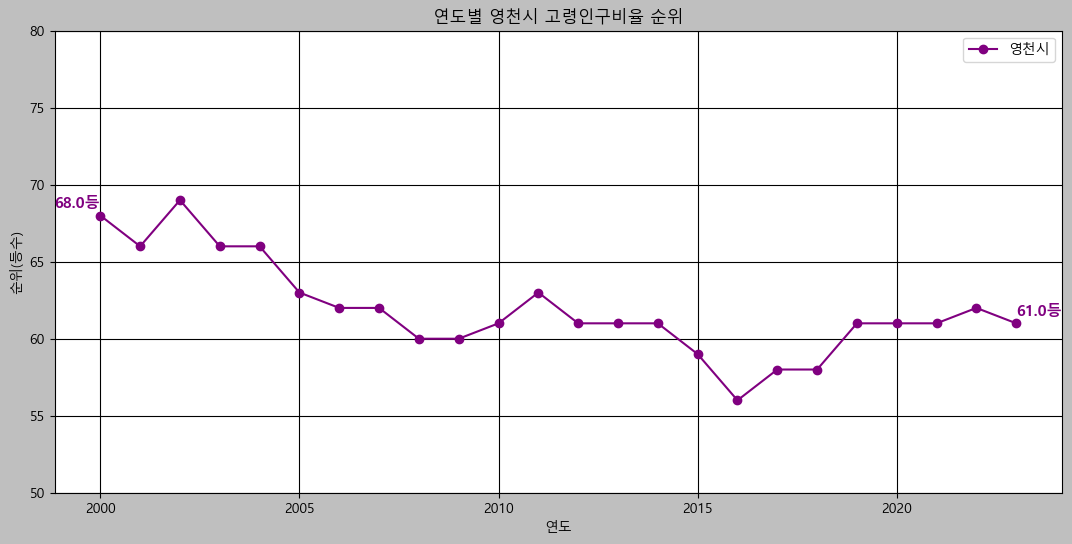

In [236]:
import matplotlib.pyplot as plt

# 연도별 순위를 저장할 빈 딕셔너리를 생성합니다.
ranks = {}

# 각 연도에 대해 순위를 계산합니다.
for year in range(2000, 2024):
    df_level2['Rank'] = df_level2[str(year)].rank(ascending=False, method='min')
    yeongcheon_rank = df_level2[df_level2['행정구역별2레벨'] == '영천시']['Rank'].values[0]
    ranks[year] = yeongcheon_rank

# 연도와 순위를 그래프로 표시합니다.
plt.figure(figsize=(13, 6))
plt.plot(list(ranks.keys()), list(ranks.values()), color='purple', marker='o', label='영천시', linewidth=1.5)  # 영천시의 고령인구비율을 그립니다.
plt.xlabel('연도')
plt.ylabel('순위(등수)')
plt.title('연도별 영천시 고령인구비율 순위')
plt.grid(True)  # 그리드를 표시합니다.
plt.ylim(50, 80)  # y축의 범위를 50에서 70으로 설정합니다.

# 시작점과 끝점에 수치를 표시합니다.
start_year = min(ranks.keys())
end_year = max(ranks.keys())
plt.text(start_year, ranks[start_year] + 0.5, str(ranks[start_year]) + '등', ha='right', fontweight='bold', color='purple', fontsize=11) 
plt.text(end_year, ranks[end_year] + 0.5, str(ranks[end_year]) + '등', ha='left', fontweight='bold', color='purple', fontsize=11)

plt.legend()  # 범례를 표시합니다.
plt.show()